https://docs.google.com/document/d/1hL9b8-5Isej3go9uB1tXIl2rmjRtCg_yA1vonzbPsdY/edit

In [ ]:
import pandas as pd
import numpy as np
hotel = pd.read_csv("https://github.com/dm-fedorov/pandas_basic/blob/master/data/bookings_01.csv.zip?raw=True",
                compression="zip",
                sep=";")

In [ ]:
hotel.head(3)

,Hotel,Is Canceled,Lead Time,arrival full date,Arrival Date Year,Arrival Date Month,Arrival Date Week Number,Arrival Date Day of Month,Stays in Weekend nights,Stays in week nights,stays total nights,Adults,Children,Babies,Meal,Country,Reserved Room Type,Assigned room type,customer type,Reservation Status,Reservation status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015-07-01,2015,July,27,1,0,1,1,1,0.0,0,BB,GBR,A,C,Transient,Check-Out,2015-07-02


2) Приведите названия колонок к нижнему регистру и замените пробелы на знак нижнего подчеркивания.

In [ ]:
hotel = hotel.rename(columns=lambda x: x.replace(' ','_').lower())
hotel.head(1)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01


In [ ]:
hotel.dtypes

hotel                         object
is_canceled                    int64
lead_time                      int64
arrival_full_date             object
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
stays_total_nights             int64
adults                         int64
children                     float64
babies                         int64
meal                          object
country                       object
reserved_room_type            object
assigned_room_type            object
customer_type                 object
reservation_status            object
reservation_status_date       object
dtype: object

In [ ]:
hotel.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_full_date              0
arrival_date_year              0
arrival_date_month             0
arrival_date_week_number       0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
stays_total_nights             0
adults                         0
children                       4
babies                         0
meal                           0
country                      488
reserved_room_type             0
assigned_room_type             0
customer_type                  0
reservation_status             0
reservation_status_date        0
dtype: int64

In [ ]:
hotel.shape

(119390, 21)

In [ ]:
#столбцы с NaN
country_ = hotel.country.isna()
print(hotel[country_]) #столбец country имеет 488 NaN
children_ = hotel.children.isna()
print(hotel[children_]) #столбец children имеет 4 NaN
# .. и тохо 494 строки из 119390 имеют NaN и 2 столбца из 21.

               hotel  is_canceled  ...  reservation_status reservation_status_date
30      Resort Hotel            0  ...           Check-Out              2015-07-15
4127    Resort Hotel            1  ...            Canceled              2016-02-15
7092    Resort Hotel            1  ...            Canceled              2016-07-20
7860    Resort Hotel            1  ...            Canceled              2016-07-22
8779    Resort Hotel            1  ...            Canceled              2016-10-13
...              ...          ...  ...                 ...                     ...
65908     City Hotel            1  ...            Canceled              2017-04-10
65909     City Hotel            1  ...            Canceled              2017-04-10
65910     City Hotel            1  ...            Canceled              2017-04-10
80830     City Hotel            0  ...           Check-Out              2015-11-26
101488    City Hotel            0  ...           Check-Out              2016-11-17

[48

In [ ]:
print(hotel.shape)
op = hotel.dropna()
print(op.shape)

(119390, 21)
(118898, 21)


3) Пользователи из каких стран совершили наибольшее число успешных бронирований? Укажите топ-5.


In [ ]:
list(hotel[hotel['is_canceled'] == 0].groupby('country')['country'].count().sort_values(ascending=False).head(5).index[:])

['PRT', 'GBR', 'FRA', 'ESP', 'DEU']

4) На сколько ночей в среднем бронируют отели разных типов?

In [ ]:
# hotel – тип отеля, stays_total_nights	- сколько ночей
i = round(hotel.groupby('hotel').stays_total_nights.mean()).astype('int').reset_index()
i.columns = ['отель','nights_mean']
i

,отель,nights_mean
0,City Hotel,3
1,Resort Hotel,4


5) Иногда тип номера, полученного клиентом (assigned_room_type), отличается от изначально забронированного (reserved_room_type). Такое может произойти, например, по причине овербукинга. Сколько подобных наблюдений встретилось в датасете?


In [ ]:
len(hotel[hotel.assigned_room_type != hotel.reserved_room_type])

14917

6) Проанализируйте даты запланированного прибытия.

– На какой месяц чаще всего успешно оформляли бронь в 2016? Изменился ли самый популярный месяц в 2017?


In [ ]:
hotel.head(1)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015-07-01,2015,July,27,1,0,0,0,2,0.0,0,BB,PRT,C,C,Transient,Check-Out,2015-07-01


In [ ]:
hotel.dtypes

hotel                         object
is_canceled                    int64
lead_time                      int64
arrival_full_date             object
arrival_date_year              int64
arrival_date_month            object
arrival_date_week_number       int64
arrival_date_day_of_month      int64
stays_in_weekend_nights        int64
stays_in_week_nights           int64
stays_total_nights             int64
adults                         int64
children                     float64
babies                         int64
meal                          object
country                       object
reserved_room_type            object
assigned_room_type            object
customer_type                 object
reservation_status            object
reservation_status_date       object
dtype: object

In [ ]:
i = round(hotel[hotel.arrival_date_year == 2016].arrival_date_month.value_counts(normalize = True)*100,2).reset_index()
i
# Процент заказов в октябре 2016 года выше всего, хоть и не намного

,index,arrival_date_month
0,October,10.94
1,May,9.66
2,April,9.57
3,September,9.51
4,June,9.33
5,August,8.93
6,March,8.51
7,July,8.06
8,November,7.85
9,February,6.86


In [ ]:
j = round(hotel[hotel.arrival_date_year == 2017].arrival_date_month.value_counts(normalize = True)*100,2).reset_index()
j
# в 2017 году самый популярный месяц изменился и вместо октября стал май, а октябрь исчез совсем

,index,arrival_date_month
0,May,15.52
1,April,13.91
2,June,13.88
3,July,13.06
4,March,12.22
5,August,12.10
6,February,10.27
7,January,9.05


In [ ]:
s = pd.merge(i,j,how='outer',on='index').fillna(0).set_index('index').rename(
                        columns={'arrival_date_month_x': '2016_год','arrival_date_month_y': '2017_год'}
                       )
s = s[(s['2016_год'] == s['2016_год'].max()) ^ (s['2017_год'] == s['2017_год'].max())]
s.T # в этом блоке просто по-разному попробовал представить данные более наглядно, получилось так себе))

index,October,May
2016_год,10.94,9.66
2017_год,0.00,15.52


AxesSubplot(0.125,0.125;0.775x0.755)


,2016_год,2017_год
index,,
October,10.94,0.00
May,9.66,15.52
April,9.57,13.91
September,9.51,0.00
June,9.33,13.88
August,8.93,12.10
March,8.51,12.22
July,8.06,13.06
November,7.85,0.00


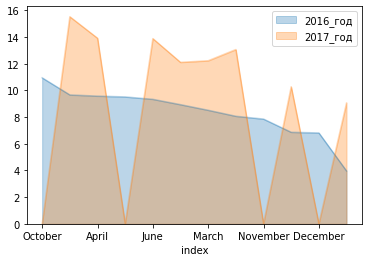

In [ ]:
df_graphic = pd.merge(i,j,how='outer',on='index').fillna(0).set_index('index').rename(
                        columns={'arrival_date_month_x': '2016_год','arrival_date_month_y': '2017_год'}
                       )
print(df_graphic.plot.area(stacked=False, alpha=0.3))
df_graphic

– Сгруппируйте данные по годам и проверьте, на какой месяц бронирования отеля типа City Hotel отменялись чаще всего в каждый из периодов

In [ ]:
# 2 решения

In [ ]:
hotel.sample(1)

,hotel,is_canceled,lead_time,arrival_full_date,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,stays_total_nights,adults,children,babies,meal,country,reserved_room_type,assigned_room_type,customer_type,reservation_status,reservation_status_date
104845,City Hotel,0,33,2017-01-15,2017,January,3,15,3,5,8,3,0.0,0,BB,CYP,D,D,Transient-Party,Check-Out,2017-01-23


In [ ]:
r = hotel['hotel'] == 'City Hotel'
t = hotel['is_canceled'] == True
qw = hotel[(r) & (t)].groupby(['arrival_date_year','arrival_date_month'])['arrival_date_month'].agg(['count']).reset_index()

i = qw[qw.arrival_date_year == 2015]['count'].max()
i_ = qw[(qw.arrival_date_year == 2015) & (qw['count'] == i)]

j = qw[qw.arrival_date_year == 2016]['count'].max()
j_ = qw[(qw.arrival_date_year == 2016) & (qw['count'] == j)]

k = qw[qw.arrival_date_year == 2017]['count'].max()
k_ = qw[(qw.arrival_date_year == 2017) & (qw['count'] == k)]

pd.concat([i_,j_,k_])

,arrival_date_year,arrival_date_month,count
5,2015,September,1543
16,2016,October,1947
25,2017,May,2217


In [ ]:
r = hotel['hotel'] == 'City Hotel'
t = hotel['is_canceled'] == True
qw = hotel[(r) & (t)].groupby(['arrival_date_year','arrival_date_month'])['arrival_date_month'].agg(['count']).reset_index()
pd.pivot_table(qw,index=['arrival_date_year'],values=['arrival_date_month','count'],aggfunc=np.max)

,arrival_date_month,count
arrival_date_year,,
2015,September,1543
2016,September,1947
2017,May,2217


7) Посмотрите на числовые характеристики трёх переменных: adults, children и babies. Какая из них имеет наибольшее среднее значение?


In [ ]:
hotel[['adults','children','babies']].mean().index[0]

'adults'

In [ ]:
8) Создайте колонку total_kids, объединив children и babies.
Отели какого типа в среднем пользуются большей популярностью у клиентов с детьми?

In [ ]:
hotel['children'] = hotel['children'].fillna(0)
hotel['total_kids'] = hotel['children'] + hotel['babies']
hotel['total_kids'] = hotel['total_kids'].astype('int')
i = hotel.groupby('hotel').total_kids.sum()
print(f'В {i.index[0]} чаще всего селятся клиенты с детьми')

В City Hotel чаще всего селятся клиенты с детьми


9) Создайте переменную has_kids, которая принимает значение True, если клиент при бронировании указал хотя бы одного ребенка (total_kids), в противном случае – False.

In [ ]:
import numpy as np
hotel['has_kids'] = np.where(True, hotel['total_kids'] > 0, False)
hotel[['total_kids','has_kids']].sample(15)

,total_kids,has_kids
93463,0,False
58892,0,False
42519,0,False
63351,0,False
25093,0,False
101144,0,False
48623,0,False
22397,0,False
74960,0,False
77407,0,False
